In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [5]:
df.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace = True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df = pd.get_dummies(df,columns = ["Geography","Gender"],drop_first = True)



In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["Exited"])
y = df["Exited"]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.2,random_state = 1
)

In [25]:
X_train.shape

(8000, 11)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()

X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [32]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-09-04 20:15:17.743071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757016918.043922      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757016918.123654      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [48]:
model = Sequential()

model.add(Dense(11,activation = "relu",input_dim = 11))
model.add(Dense(11,activation = "relu",input_dim = 11))
model.add(Dense(1,activation = "sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(loss = "binary_crossentropy",optimizer = "Adam")

In [63]:
history = model.fit(X_train_scaled,y_train,epochs = 50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3135 - val_loss: 0.3533
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3256 - val_loss: 0.3519
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3190 - val_loss: 0.3516
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3176 - val_loss: 0.3531
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3169 - val_loss: 0.3531
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3158 - val_loss: 0.3515
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3162 - val_loss: 0.3536
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3256 - val_loss: 0.3520
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3210 - val_loss: 0.3531
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3083 - val_loss: 0.3516
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3151 - val_loss: 0.3528
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [57]:
model.layers[1].get_weights()

[array([[ 0.51459473, -0.645788  ,  0.6589634 ,  0.5758055 ,  0.2941622 ,
         -0.24794404,  0.2746984 , -0.6368372 , -0.0855658 ,  0.4905018 ,
         -0.45401677],
        [ 0.5177585 ,  0.12290259,  0.6439218 ,  0.23946016, -0.7561837 ,
         -0.2224244 , -0.37922695,  0.23298271,  0.50221264, -0.36288518,
         -0.6437399 ],
        [ 0.07618897,  0.03848313, -0.27465186,  0.63193095, -0.27678242,
          0.20819627,  0.60233915,  0.12732415,  0.76278085, -0.30065253,
          0.6395064 ],
        [ 0.22775228, -0.20151047, -0.5426423 ,  0.52400756, -0.32854167,
          0.36596778, -0.8477659 , -0.6329879 , -0.38392454,  0.26848286,
          0.3122498 ],
        [ 0.5913532 , -0.05814805, -0.17975204, -0.51580137,  0.3741995 ,
         -0.06615975, -0.3272741 ,  0.03205369, -1.5909512 , -0.35503444,
         -0.37593645],
        [ 0.5947322 , -0.82747227, -0.05624147, -0.4078009 ,  0.25452122,
          0.6136627 , -0.04952839, -0.36294803,  0.33037257,  0.4613649

In [65]:
y_log =  model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [66]:
y_pred = np.where(y_log>0.5,1,0)

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

86.05000000000001

In [69]:
import matplotlib.pyplot as plt

In [72]:
history.history

{'loss': [0.31903597712516785,
  0.3183957040309906,
  0.31899911165237427,
  0.31886646151542664,
  0.3185330629348755,
  0.3185124099254608,
  0.31872037053108215,
  0.3179425299167633,
  0.3174983263015747,
  0.31819453835487366,
  0.31798747181892395,
  0.3179892599582672,
  0.3174550533294678,
  0.31741610169410706,
  0.3176282048225403,
  0.31739532947540283,
  0.31744176149368286,
  0.3170475661754608,
  0.3174480199813843,
  0.31700924038887024,
  0.316580206155777,
  0.3163401484489441,
  0.3167852759361267,
  0.3166300654411316,
  0.3171018064022064,
  0.31659555435180664,
  0.3175045847892761,
  0.31688329577445984,
  0.3162521421909332,
  0.3169553875923157,
  0.31603845953941345,
  0.3163021206855774,
  0.31644225120544434,
  0.3163358271121979,
  0.31577956676483154,
  0.3160933256149292,
  0.3155060112476349,
  0.3158014714717865,
  0.3158169984817505,
  0.3164180815219879,
  0.3157387673854828,
  0.3161708116531372,
  0.31596896052360535,
  0.31582626700401306,
  0.3154

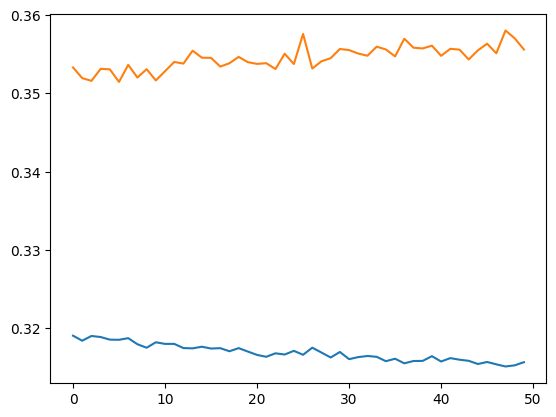

In [74]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])